### To run this, download [Anaconda](https://www.anaconda.com/products/individual)

### Import the libraries
If any are missing install using *pip3 install ...*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import numpy as np

### Configure inline charts

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,3)

### Read the data

In [3]:
data = pd.read_csv('../../DATA/DuomenuMasyvasCSV.csv')

### List the columns

In [4]:
list(data.columns)

['ID',
 'MMR reg metai',
 'PVM reg metai',
 'Statusas',
 'Mokejimai 2019m 01men',
 'Mokejimai 2019m 02men',
 'Mokejimai 2019m 03men',
 'Mokejimai 2019m 04men',
 'Mokejimai 2019m 05men',
 'Mokejimai 2019m 06men',
 'Mokejimai 2019m 07men',
 'Mokejimai 2019m 08men',
 'Mokejimai 2019m 09men',
 'Mokejimai 2019m 10men',
 'Mokejimai 2019m 11men',
 'Mokejimai 2019m 12men',
 'Mokėjimai 2019m',
 'Mokejimai 2020m 01men',
 'Mokejimai 2020m 02men',
 'Mokejimai 2020m 03men',
 'Mokejimai 2020m 04men',
 'PVMD Apyvarta 2019m 01mėn',
 'PVM Prievolė 2019m 01mėn',
 'PVMD Apyvarta 2019m 02mėn',
 'PVM Prievolė 2019m 02mėn',
 'PVMD Apyvarta 2019m 03mėn',
 'PVM Prievolė 2019m 03mėn',
 'PVMD Apyvarta 2019m 04mėn',
 'PVM Prievolė 2019m 04mėn',
 'PVMD Apyvarta 2019m 05mėn',
 'PVM Prievolė 2019m 05mėn',
 'PVMD Apyvarta 2019m 06mėn',
 'PVM Prievolė 2019m 06mėn',
 'PVMD Apyvarta 2019m 07mėn',
 'PVM Prievolė 2019m 07mėn',
 'PVMD Apyvarta 2019m 08mėn',
 'PVM Prievolė 2019m 08mėn',
 'PVMD Apyvarta 2019m 09mėn',
 'PVM 

### What types of Statusas do we have?

In [5]:
data.groupby('Statusas').size()

Statusas
0. Teisinis statusas neįregistruotas                                              72195
1. Reorganizuojamas                                                                  42
2. Dalyvaujantis reorganizavime                                                      29
23. Jungiamas peržengiant vienos valstybės ribas juridinis asmuo                      2
24. Dalyvaujantis jungimesi peržengiant vienos valstybės ribas juridinis asmuo        1
3. Pertvarkomas                                                                      71
4. Restruktūrizuojamas                                                               82
5. Bankrutuojantis                                                                  274
6. Bankrutavęs                                                                      324
7. Likviduojamas                                                                    151
8. Dalyvaujantis atskyrime                                                           23
999. Nenustatytas      

### Filter to only active companies

In [6]:
data_active = data[data['Statusas'].eq('0. Teisinis statusas neįregistruotas')]

In [7]:
data_active['ID'].size

72195

### We are down to 72195 companies - this is our universe

### Lets make a quick summary of the data; make sure we have no false assumptions or expectations

### All IDs are unique - perfect

In [8]:
data_active['ID'].unique().size

72195

### Lets look at company registration dates

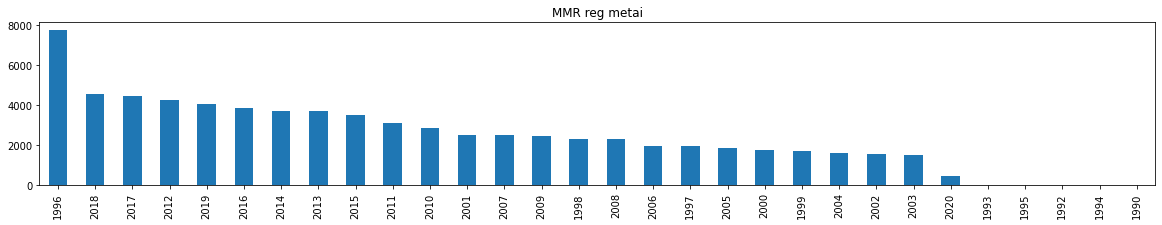

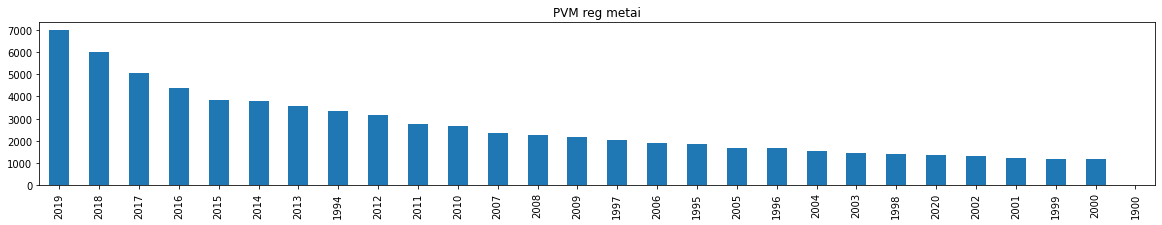

In [9]:
cols = ['MMR reg metai', 'PVM reg metai']
for col in cols:
    data_active[col].value_counts().plot(kind='bar', title=col)
    plt.show()

### *Question*: What happened to MMR register in 1996?

## Industry sectors

In [10]:
cols =  ['EV skyrius',
         'EV sekcija']


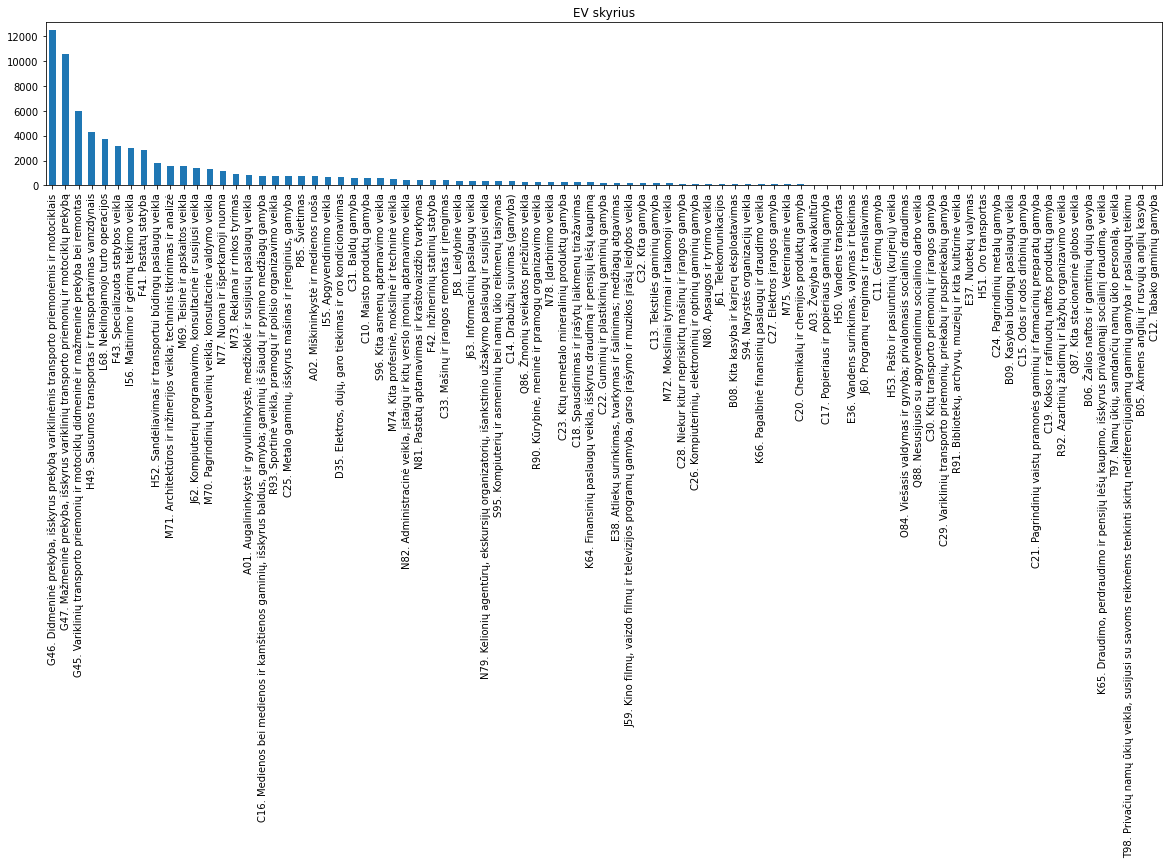

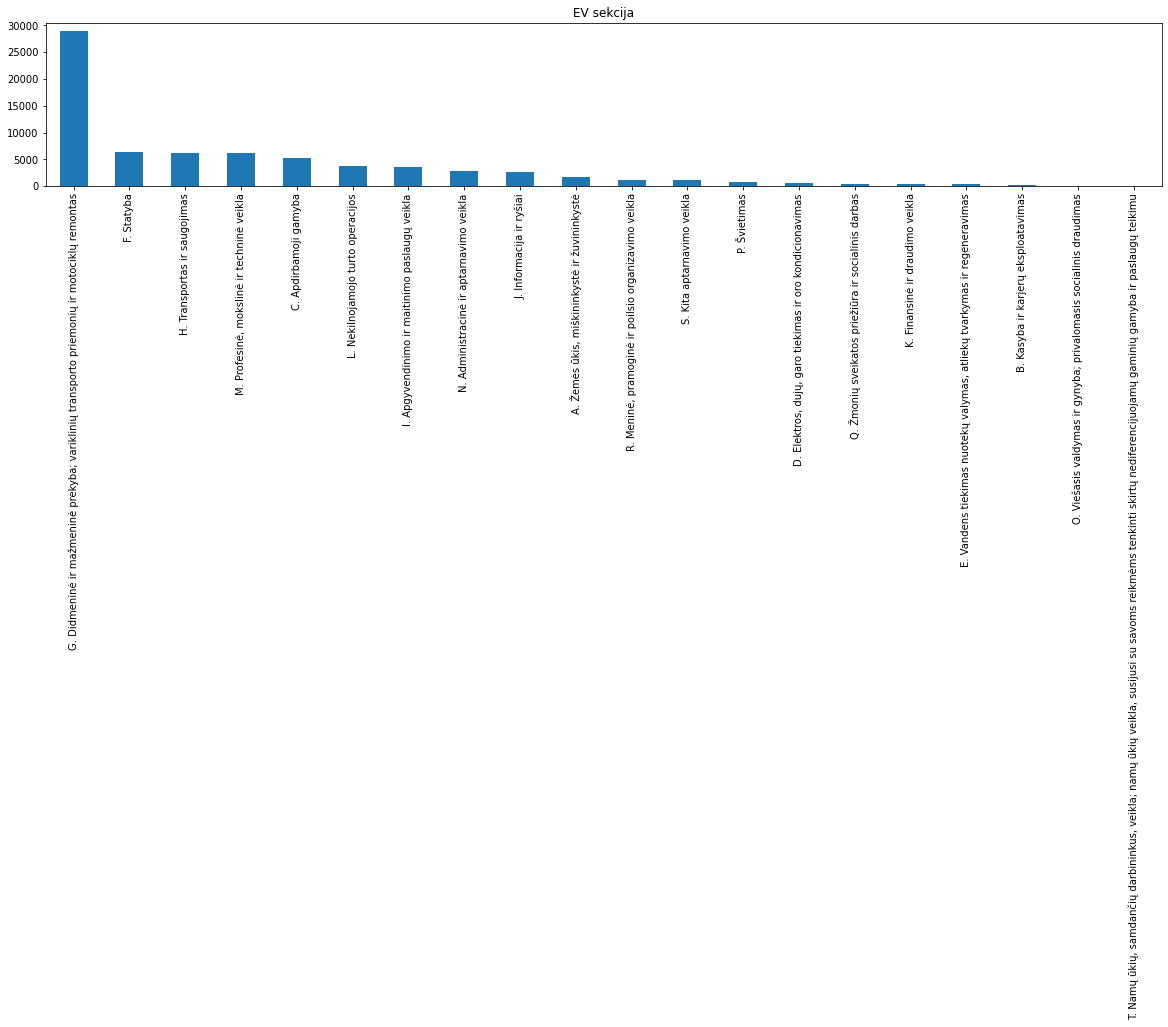

In [11]:
for col in cols:
    data_active[col].value_counts().plot(kind='bar', title=col)
    #plt.yscale('log')
    plt.show()

## Wholesale + Retail = 40% of companies in the register

In [12]:
"{:.0%}".format( data_active.groupby('EV sekcija').size().sort_values(ascending=False)[0] / data_active['ID'].size )

'40%'

## Retail + Wholesale = 46% of all revenue

In [13]:
"{:,.0%}".format( data_active.groupby('EV sekcija')['PVMD Apyvarta 2019m'].agg('sum').sort_values(ascending=False)[0] / data_active['PVMD Apyvarta 2019m'].sum() )

'46%'

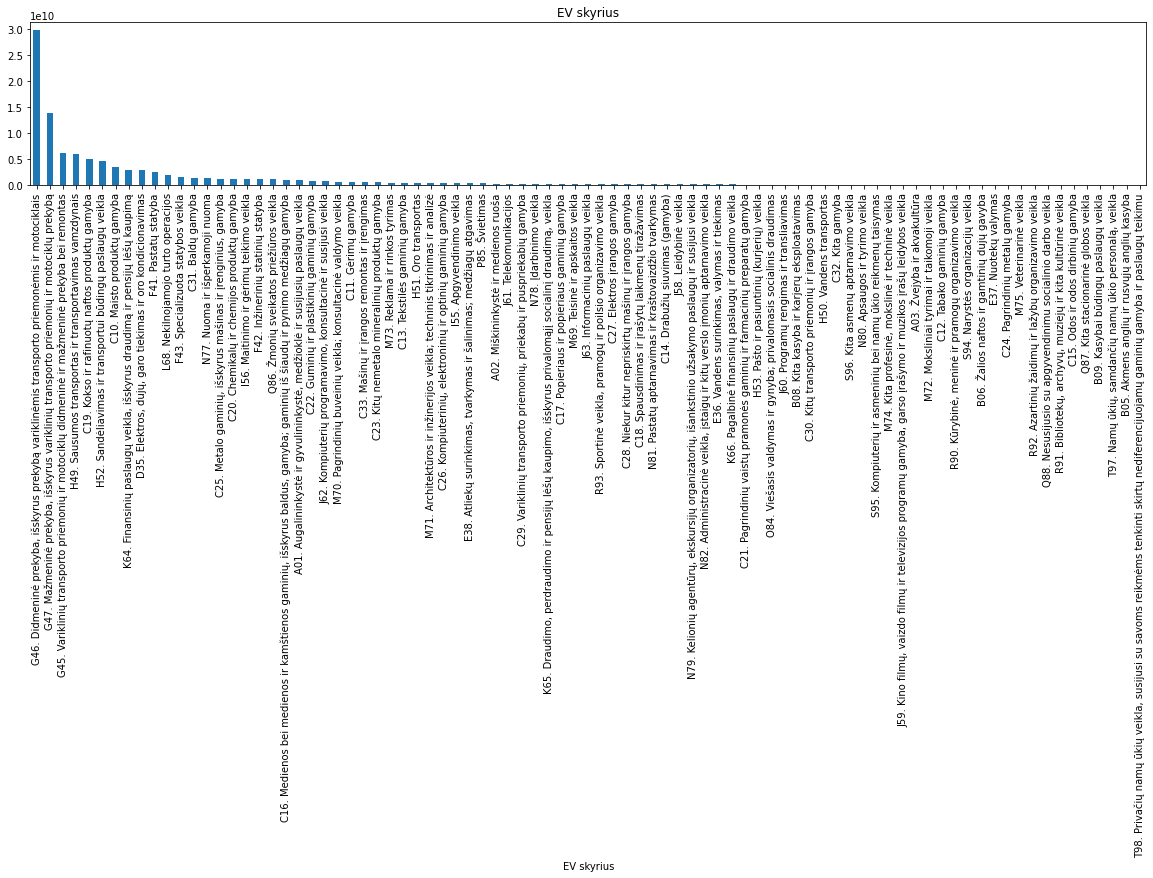

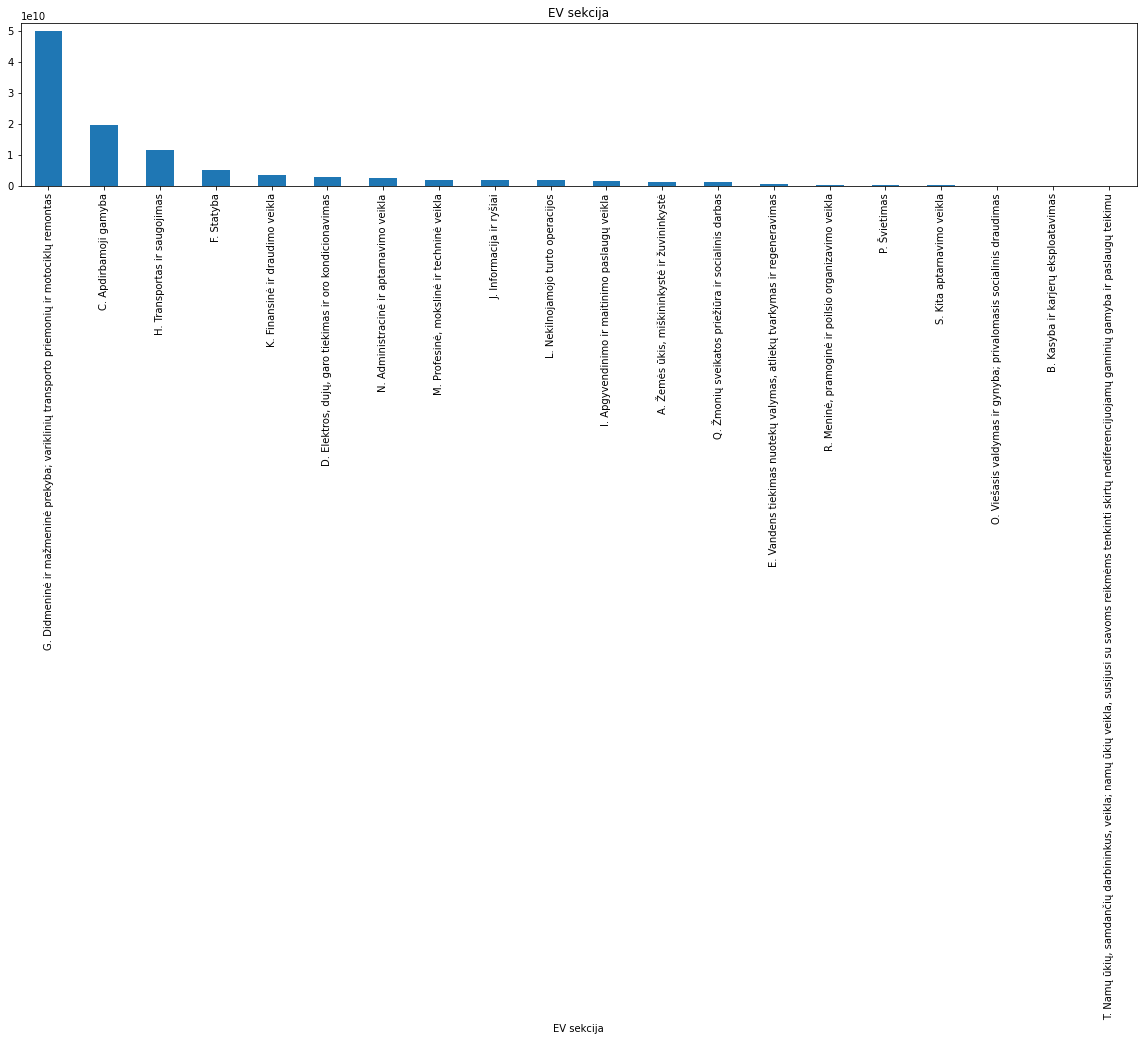

In [14]:
for col in cols:
    data_active.groupby([col])['PVMD Apyvarta 2019m'].agg('sum').sort_values(ascending=False).plot(kind='bar', title=col)
    plt.xlabel(col)
    #plt.yscale('log')
    plt.show()

## Total Annual Revenue of Retail + Wholesale (category G) in 2019 - almost 50bn EUR

In [15]:
"{:,.0f}".format( data_active.groupby('EV sekcija')['PVMD Apyvarta 2019m'].agg('sum').sort_values(ascending=False)[0] )

'49,927,507,319'

### *Question*: (to someone who knows LT economy) - is this realistic?

## Lets look into VAT numbers

In [16]:
cols = ['PVMD Apyvarta 2019m', 
        'PVM Prievolė 2019m', 
        'Mokėjimai 2019m']

/home/alfredas/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alfredas/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


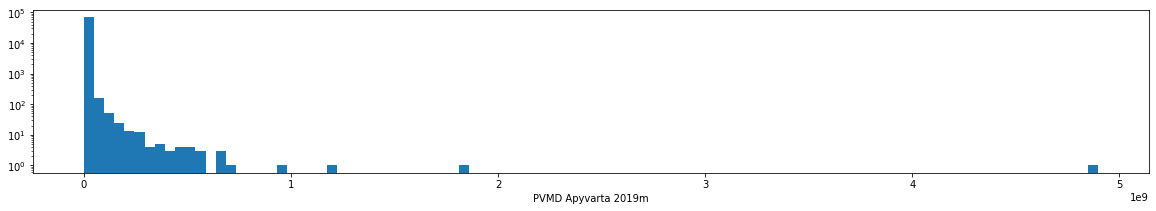

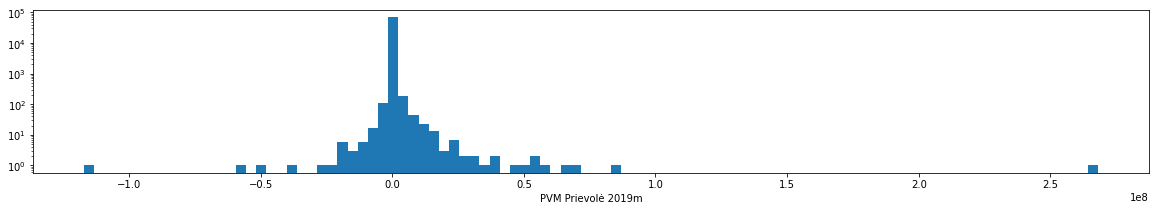

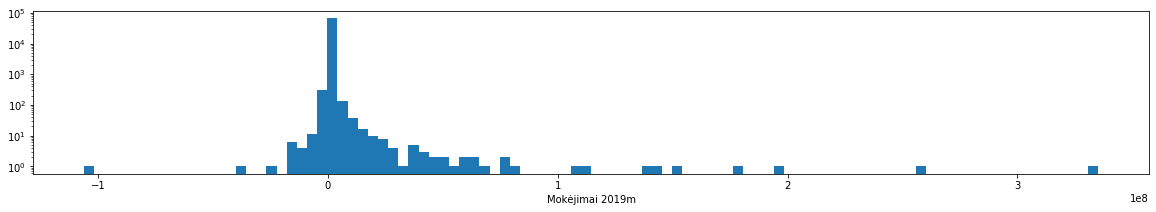

In [17]:
for col in cols:
    plt.hist(data_active[col], 100)
    plt.yscale('log')
    plt.xlabel(col)
    plt.show()

## Total Revenue (2019) - some of which is subject to VAT ~ 107Bn EUR

In [18]:
"{:,.0f}".format( data_active['PVMD Apyvarta 2019m'].sum() )


'107,761,074,956'


## Total VAT Obligation (2019) ~ 3.6Bn EUR or 3.35% of Revenue


In [19]:
"{:,.0f}".format( data_active['PVM Prievolė 2019m'].sum() )

'3,608,052,557'

In [20]:
"{:,.2%}".format( data_active['PVM Prievolė 2019m'].sum() / data_active['PVMD Apyvarta 2019m'].sum() )

'3.35%'

### *Question*: Does this - 3.6Bn EUR or 3.35% of Revenue - sound correct?

### *Question*: Does this mean that on average 16% of ALL REVENUE is what is considered VALUE ADDED; 
### which is then taxed at 21%; ( 16% * 21% = 3.35% ) ?

## Total VAT Payments (2019) ~ 8.6Bn EUR or 7.97% of Revenue

In [21]:
"{:,.0f}".format( data_active['Mokėjimai 2019m'].sum() )

'8,587,486,227'

In [22]:
"{:,.2%}".format( data_active['Mokėjimai 2019m'].sum() / data_active['PVMD Apyvarta 2019m'].sum() )

'7.97%'

### *Question*: Why do VAT payments exceed obligations more than twice?

In [23]:
data_active['PVM Prievolė nuo PVMD Apyvarta 2019m'] = data_active['PVM Prievolė 2019m'] / data_active['PVMD Apyvarta 2019m']
data_active['PVM Mokėjimai nuo PVMD Apyvarta 2019m'] = data_active['Mokėjimai 2019m'] / data_active['PVMD Apyvarta 2019m']
data_active['PVM Mokėjimai nuo PVMD Prievolė 2019m'] = data_active['Mokėjimai 2019m'] / data_active['PVM Prievolė 2019m']
data_active = data_active.replace([np.inf, -np.inf], np.nan)

/home/alfredas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/alfredas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/alfredas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

## Average VAT Obligation as share of Revenue 6%

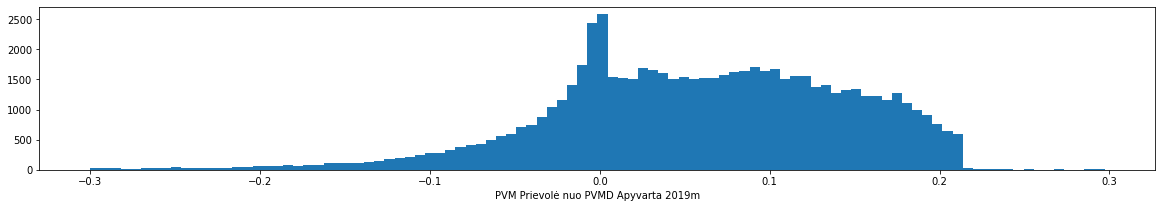

0.06076872446481462

In [24]:
col = 'PVM Prievolė nuo PVMD Apyvarta 2019m'
plt.hist(data_active[data_active[col].between(-.3,.3)][col], 100)
#plt.yscale('log')
plt.xlabel(col)
plt.show()
data_active[data_active[col].between(-.3,.3)][col].median()

## Average VAT Obligation as share of Revenue by Sector

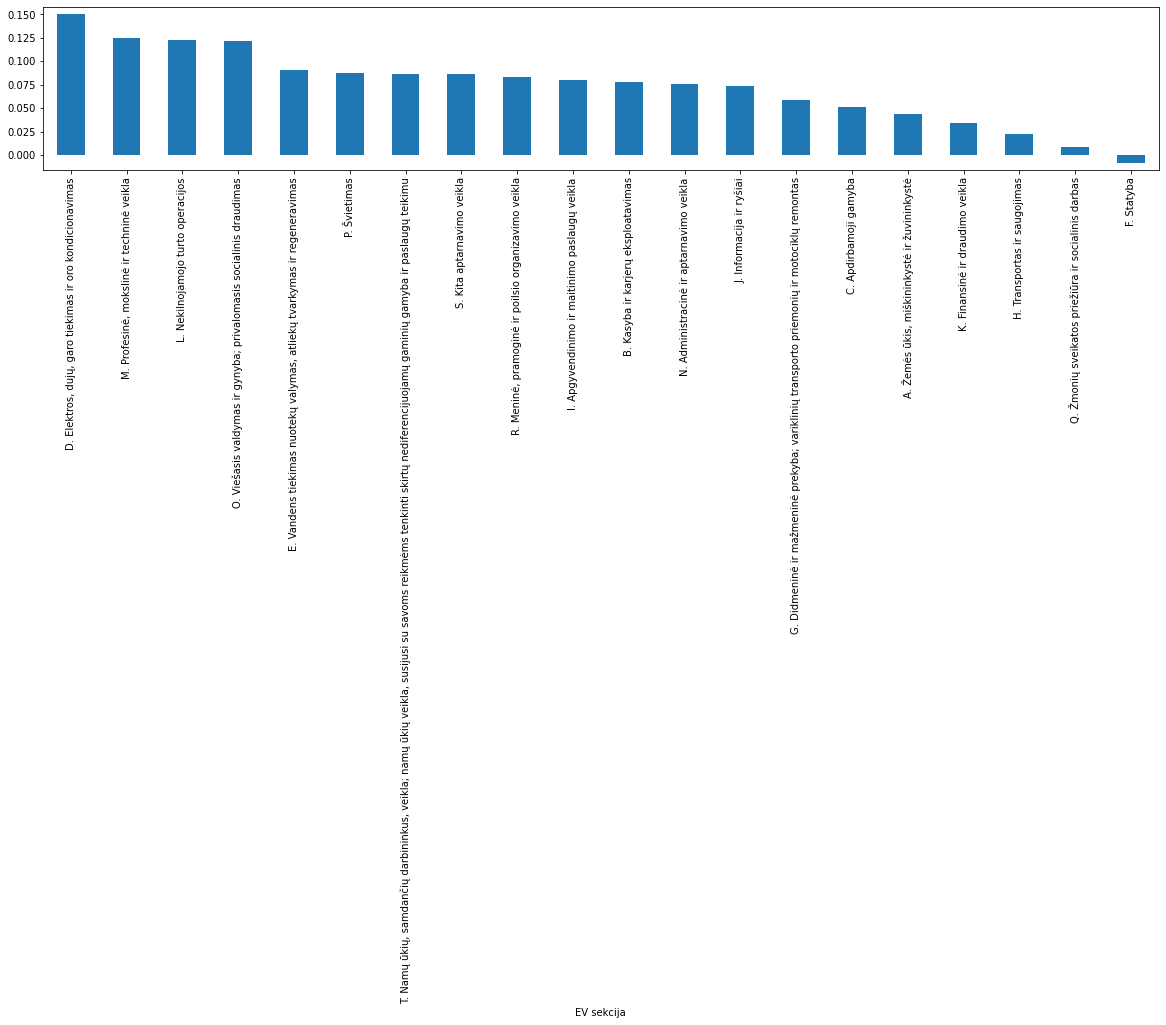

In [25]:
data_active[data_active[col].between(-.3,.3)].groupby('EV sekcija')[col].agg('median').sort_values(ascending=False).plot.bar()

## Average VAT Payment as share of Revenue 10%

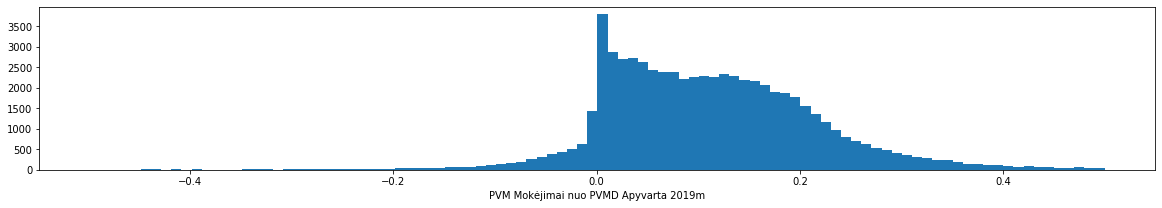

0.10222917618930417

In [26]:
col = 'PVM Mokėjimai nuo PVMD Apyvarta 2019m'
plt.hist(data_active[data_active[col].between(-.5,.5)][col], 100)
#plt.yscale('log')
plt.xlabel(col)
plt.show()
data_active[data_active[col].between(-.5,.5)][col].median()

## Average VAT Payment as share of Revenue by Sector

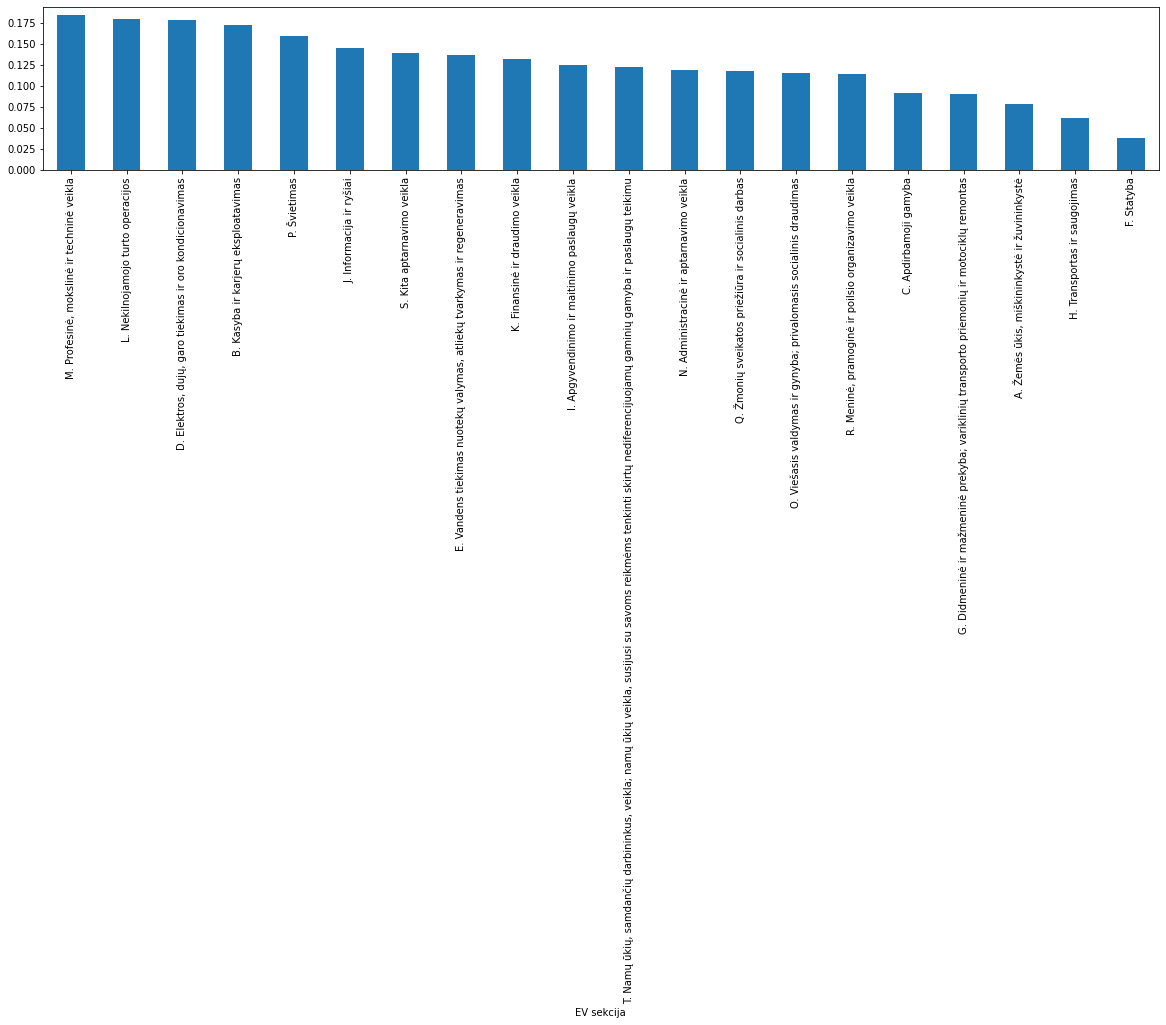

In [27]:
data_active[data_active[col].between(-.5,.5)].groupby('EV sekcija')[col].agg('median').sort_values(ascending=False).plot.bar()

## Correlation between Salary Payments and VAT Payments ~48%

In [29]:
data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m' ] = data_active['Darbo apmokėjimo suma 2019m'] / data_active['PVMD Apyvarta 2019m']
data_active = data_active.replace([np.inf, -np.inf], np.nan)

In [30]:
data_active[
            (data_active['PVM Mokėjimai nuo PVMD Apyvarta 2019m'].between(-.5,.5)) &
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].between(0,1))
        ][['Mokėjimai 2019m','Darbo apmokėjimo suma 2019m']].corr()

,Mokėjimai 2019m,Darbo apmokėjimo suma 2019m
Mokėjimai 2019m,1.000000,0.483465
Darbo apmokėjimo suma 2019m,0.483465,1.000000


## (High VAT) Services --> Retail --> Manufacturing --> Agriculture (Low VAT)

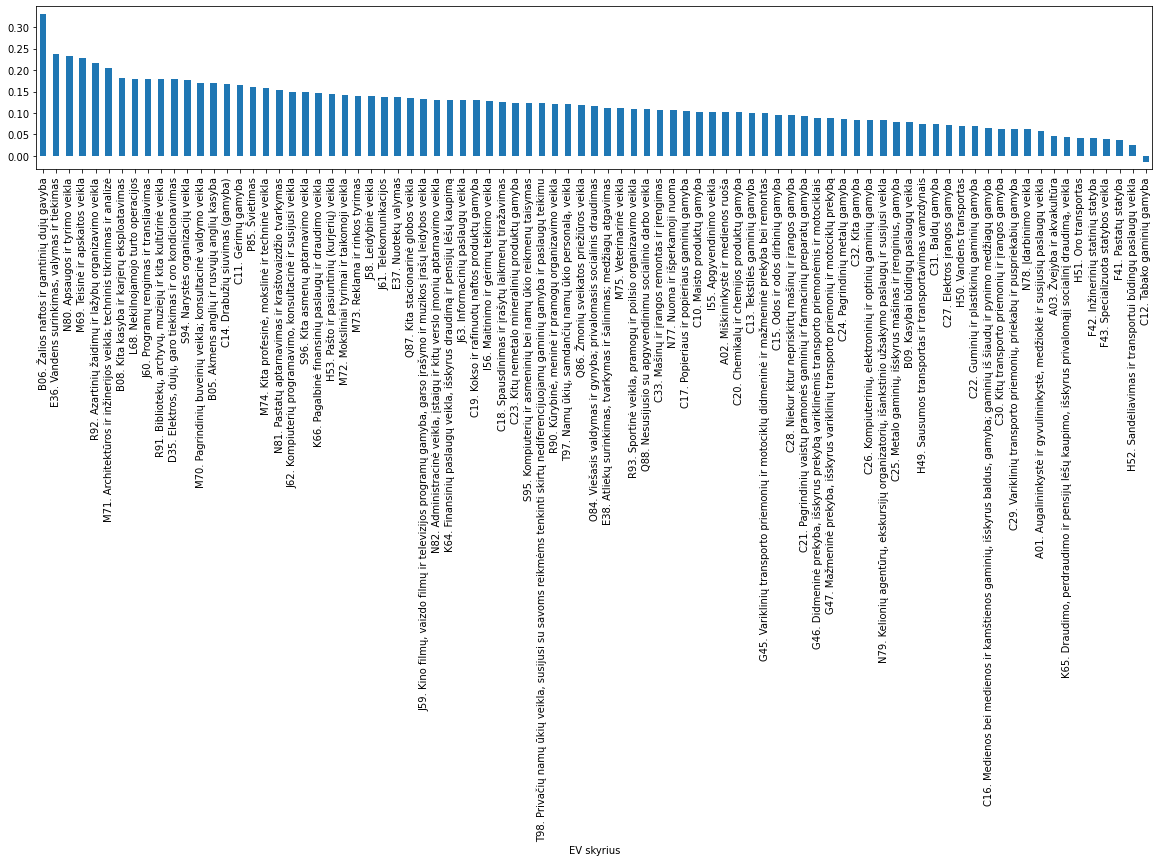

In [31]:
data_active[data_active[col].between(-.5,.5)].groupby('EV skyrius')[col].agg('median').sort_values(ascending=False).plot.bar()

## Average VAT Payment is Equal to Average VAT Obligation

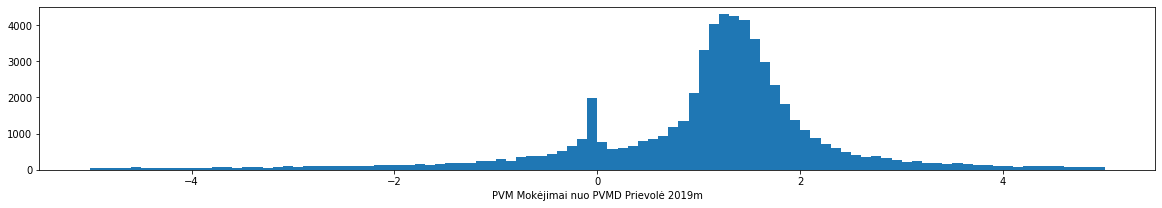

1.0415817226848039

In [32]:
col = 'PVM Mokėjimai nuo PVMD Prievolė 2019m'
plt.hist(data_active[data_active[col].between(-5,5)][col], 100)
#plt.yscale('log')
plt.xlabel(col)
plt.show()
data_active[data_active[col].between(-5,5)][col].mean()

## Salaries & Employment

In [33]:
cols = [
     'Darbuotojai 20200301',
     'Darbuotojai 20200401',
     'Darbo apmokėjimo suma 2019m']

/home/alfredas/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alfredas/.local/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


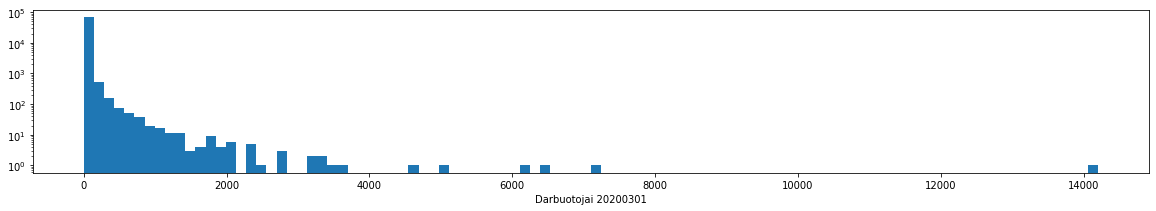

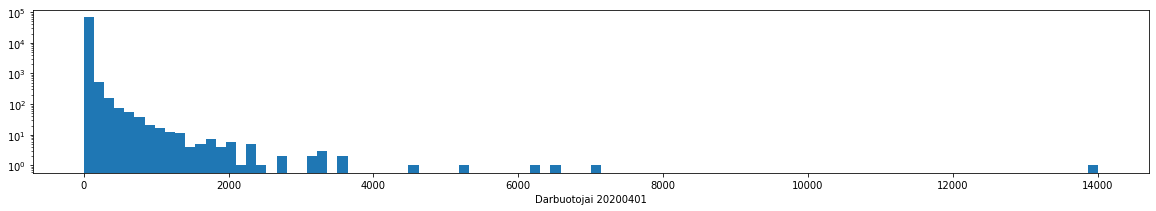

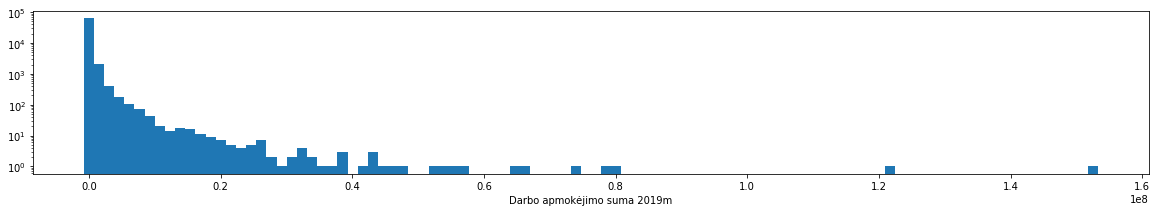

In [34]:
for col in cols:
    plt.hist(data_active[col], 100)
    plt.yscale('log')
    plt.xlabel(col)
    plt.show()

## Average number of employees is 15


In [35]:
data_active['Darbuotojai 20200301'].mean()

15.045411110318762

In [36]:
data_active['Darbuotojai 20200301'].std()

105.03360392925204

## 0.12% of companies (86) produce 18.25% of all revenue and employ 17% of all people

In [37]:
data_active[data_active['Darbuotojai 20200301']>1000]['ID'].size

86

In [38]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>1000]['ID'].size / data_active['ID'].size )

'0.12%'

In [39]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>1000]['PVMD Apyvarta 2019m'].sum() / 
    data_active['PVMD Apyvarta 2019m'].sum()
    )

'18.25%'

In [40]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>1000]['Darbuotojai 20200301'].sum() / 
    data_active['Darbuotojai 20200301'].sum()
    )

'17.03%'

## 2% of companies (1447) produce 50% of all revenue and employ 50% of all people

In [41]:
data_active[data_active['Darbuotojai 20200301']>100]['ID'].size

1447

In [42]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>100]['ID'].size / data_active['ID'].size )

'2.00%'

In [43]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>100]['PVMD Apyvarta 2019m'].sum() / 
    data_active['PVMD Apyvarta 2019m'].sum()
    )

'51.51%'

In [44]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>100]['Darbuotojai 20200301'].sum() / 
    data_active['Darbuotojai 20200301'].sum()
    )

'48.94%'

## ... they also pay 55% of all the salaries

In [45]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>100]['Darbo apmokėjimo suma 2019m'].sum() / 
    data_active['Darbo apmokėjimo suma 2019m'].sum()
    )

'54.61%'

## ... they pay 56% of all the VAT

In [46]:
"{:,.2%}".format( 
    data_active[data_active['Darbuotojai 20200301']>100]['Mokėjimai 2019m'].sum() / 
    data_active['Mokėjimai 2019m'].sum()
    )

'55.61%'

## Top 4 sectors make up 80% of all revenue

In [47]:
(data_active.groupby(['EV sekcija'])['PVMD Apyvarta 2019m'].agg('sum') / data_active['PVMD Apyvarta 2019m'].sum()).sort_values(ascending=False)[0:4].sum()

0.8015616909377408

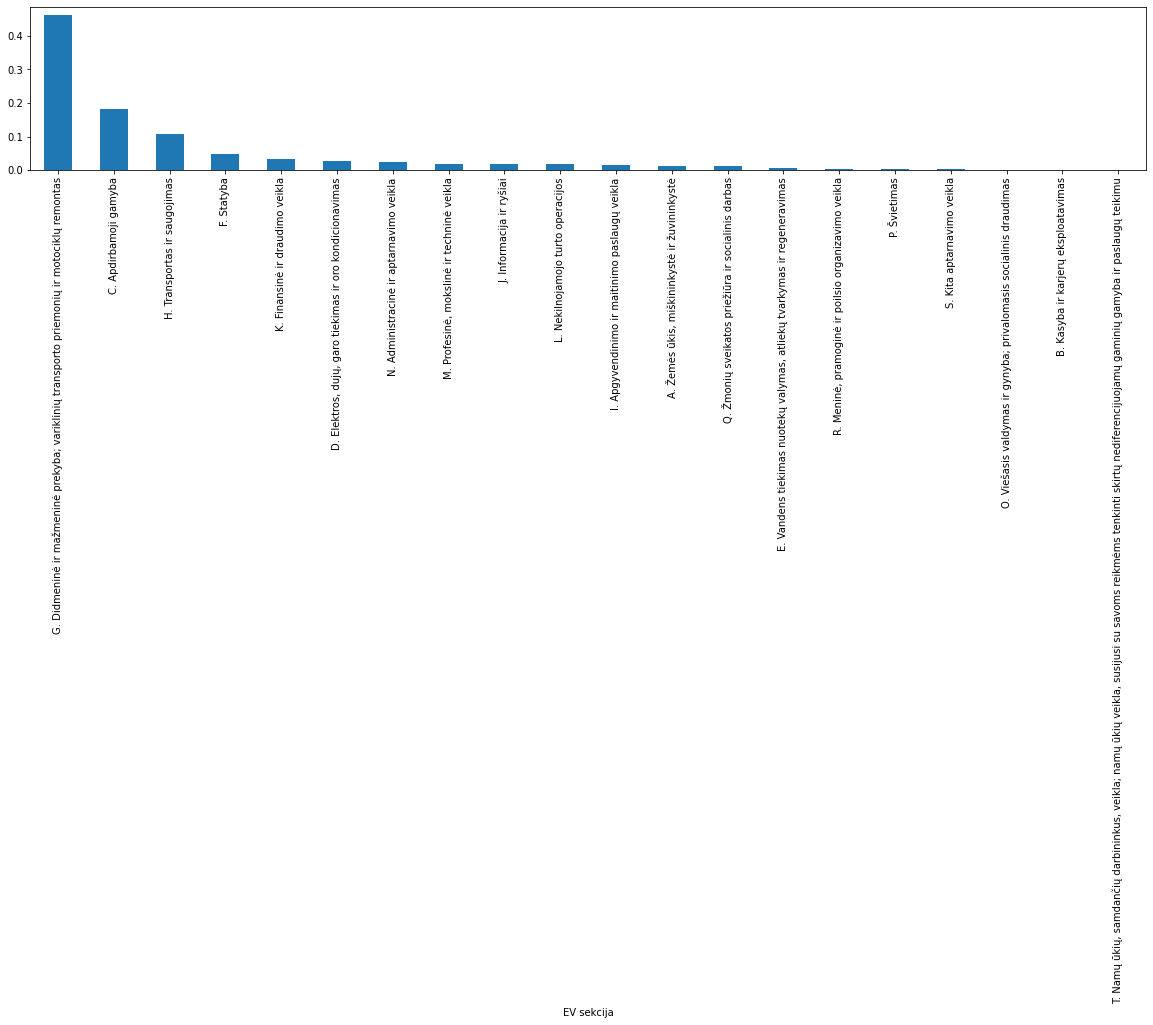

In [48]:
(data_active.groupby(['EV sekcija'])['PVMD Apyvarta 2019m'].agg('sum') / data_active['PVMD Apyvarta 2019m'].sum()).sort_values(ascending=False).plot.bar()

## Top 4 sectors employ 65% of all people

In [49]:
(data_active.groupby(['EV sekcija'])['Darbuotojai 20200301'].agg('sum') / data_active['Darbuotojai 20200301'].sum()).sort_values(ascending=False)[0:4].sum()

0.6477914208713736

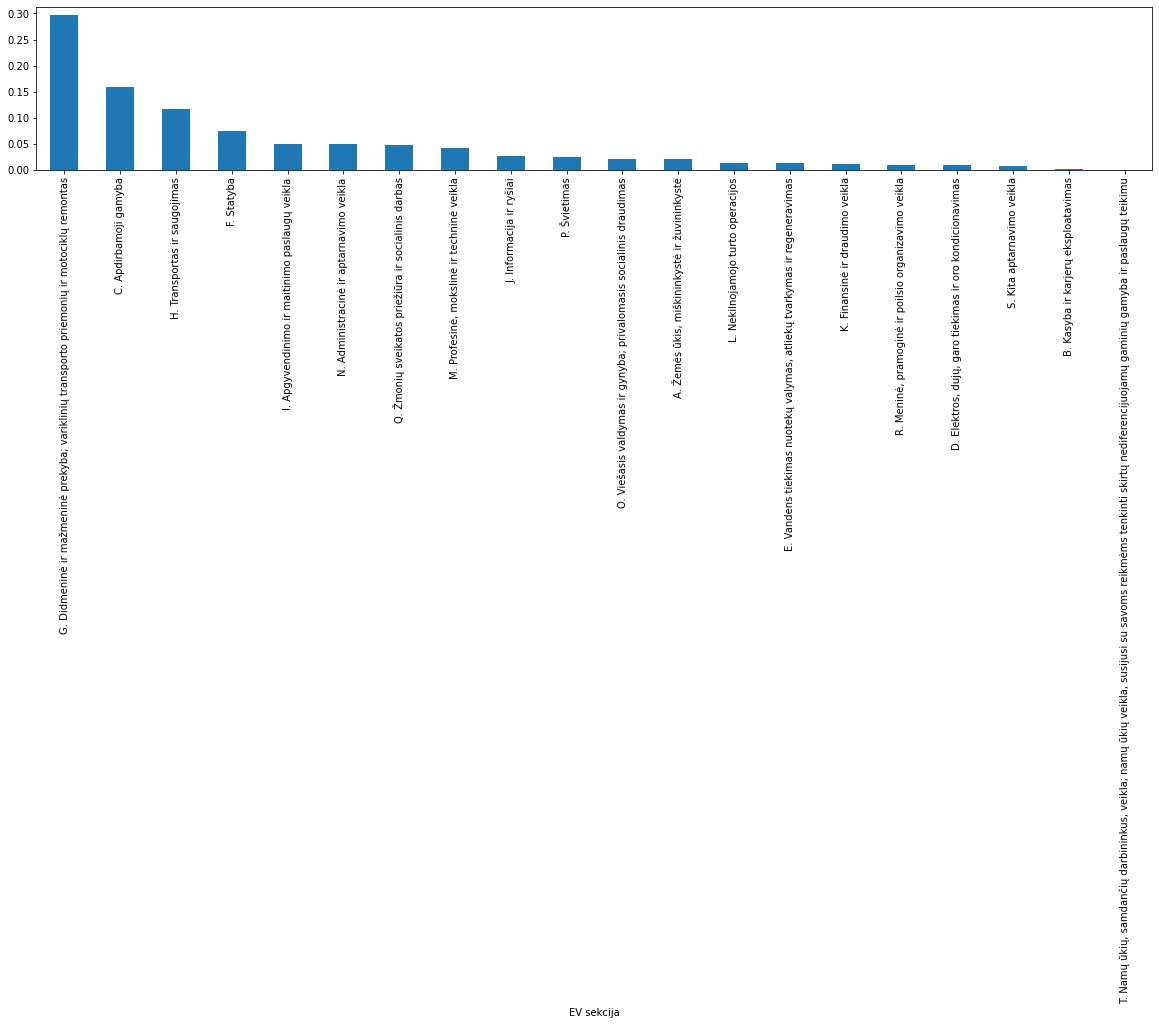

In [50]:
(data_active.groupby(['EV sekcija'])['Darbuotojai 20200301'].agg('sum') / data_active['Darbuotojai 20200301'].sum()).sort_values(ascending=False).plot.bar()

### *Question*: Why do some salaries have negative values? Data error?

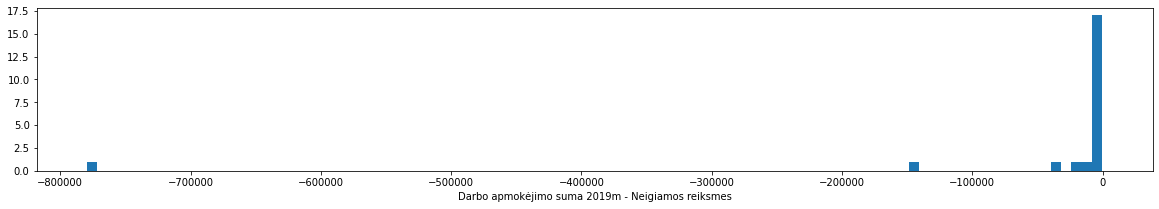

In [51]:
plt.hist(data_active[data_active['Darbo apmokėjimo suma 2019m']<0]['Darbo apmokėjimo suma 2019m'], 100)
plt.xlabel('Darbo apmokėjimo suma 2019m - Neigiamos reiksmes')
plt.show()

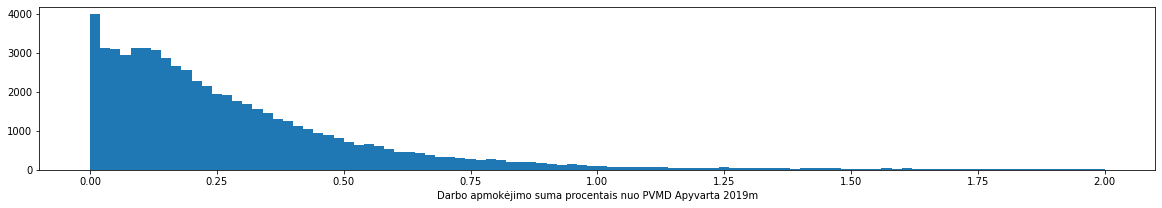

In [52]:
plt.hist(
    data_active[
            (~data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].isnull()) &  
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']>0) &
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']<2)
            ]['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'], 100)
#plt.yscale('log')
plt.xlabel('Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m')
plt.show()


In [53]:
data_active[
            (~data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].isnull()) &  
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']>1) 
            ]['ID'].size

3527

In [54]:
"{:,.2%}".format( 
    data_active[
            (~data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].isnull()) &  
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']>1) 
            ]['ID'].size / 
    data_active['ID'].size )

'4.89%'

## 3527 (or 5%) of companies' salary payments exceed their revenues (surely not a good sign)

In [55]:
data_active[
            (~data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].isnull()) &  
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']>0.5) 
            ]['ID'].size

11808

In [56]:
"{:,.2%}".format( 
    data_active[
            (~data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m'].isnull()) &  
            (data_active['Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m']>0.5) 
            ]['ID'].size / 
    data_active['ID'].size )

'16.36%'

## 11808 (or 16%) of companies' salary payments make up at least half of their revenues

## Average salary

In [57]:
data_active['Vidutinis darbuotojo uzmokestis 2019m'] = data_active['Darbo apmokėjimo suma 2019m'] / data_active['Darbuotojai 20200301']
data_active = data_active.replace([np.inf, -np.inf], np.nan)

In [58]:
data_active['Vidutinis darbuotojo uzmokestis 2019m'].mean()

9346.123791207547

### Average annual salary is 9346 EUR

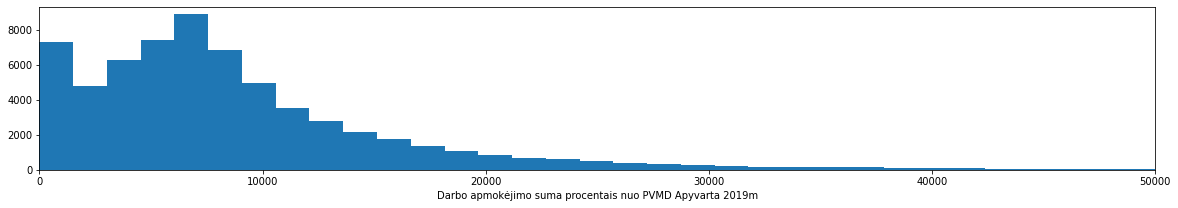

In [59]:

plt.hist(
        data_active[data_active['Vidutinis darbuotojo uzmokestis 2019m']>0 ]['Vidutinis darbuotojo uzmokestis 2019m'], 
        500
    )
#plt.yscale('log')
plt.xlabel('Darbo apmokėjimo suma procentais nuo PVMD Apyvarta 2019m')
plt.xlim(0,50000)
plt.show()


### *Question*: Why is there a peak at around 1500EUR?

### Maximum salary is 756'000EUR (does not sound right)

In [60]:
data_active['Vidutinis darbuotojo uzmokestis 2019m'].max()

756447.0

## Average Salaries By Industry

In [61]:
vidutinis_uzmokestis_EV_sekcija_daugiau_nei_5_darbuotojai = pd.DataFrame(data_active[data_active['Darbuotojai 20200301']>5].groupby('EV sekcija')['Vidutinis darbuotojo uzmokestis 2019m'].mean().sort_values(ascending=False)) 

In [62]:
vidutinis_uzmokestis_EV_sekcija_daugiau_nei_5_darbuotojai

,Vidutinis darbuotojo uzmokestis 2019m
EV sekcija,
K. Finansinė ir draudimo veikla,25406.547218
J. Informacija ir ryšiai,22040.658276
O. Viešasis valdymas ir gynyba; privalomasis socialinis draudimas,18772.377446
"D. Elektros, dujų, garo tiekimas ir oro kondicionavimas",16289.984792
"M. Profesinė, mokslinė ir techninė veikla",15923.648566
B. Kasyba ir karjerų eksploatavimas,14807.112188
L. Nekilnojamojo turto operacijos,13785.751486
"E. Vandens tiekimas nuotekų valymas, atliekų tvarkymas ir regeneravimas",12558.982243
Q. Žmonių sveikatos priežiūra ir socialinis darbas,12431.295276


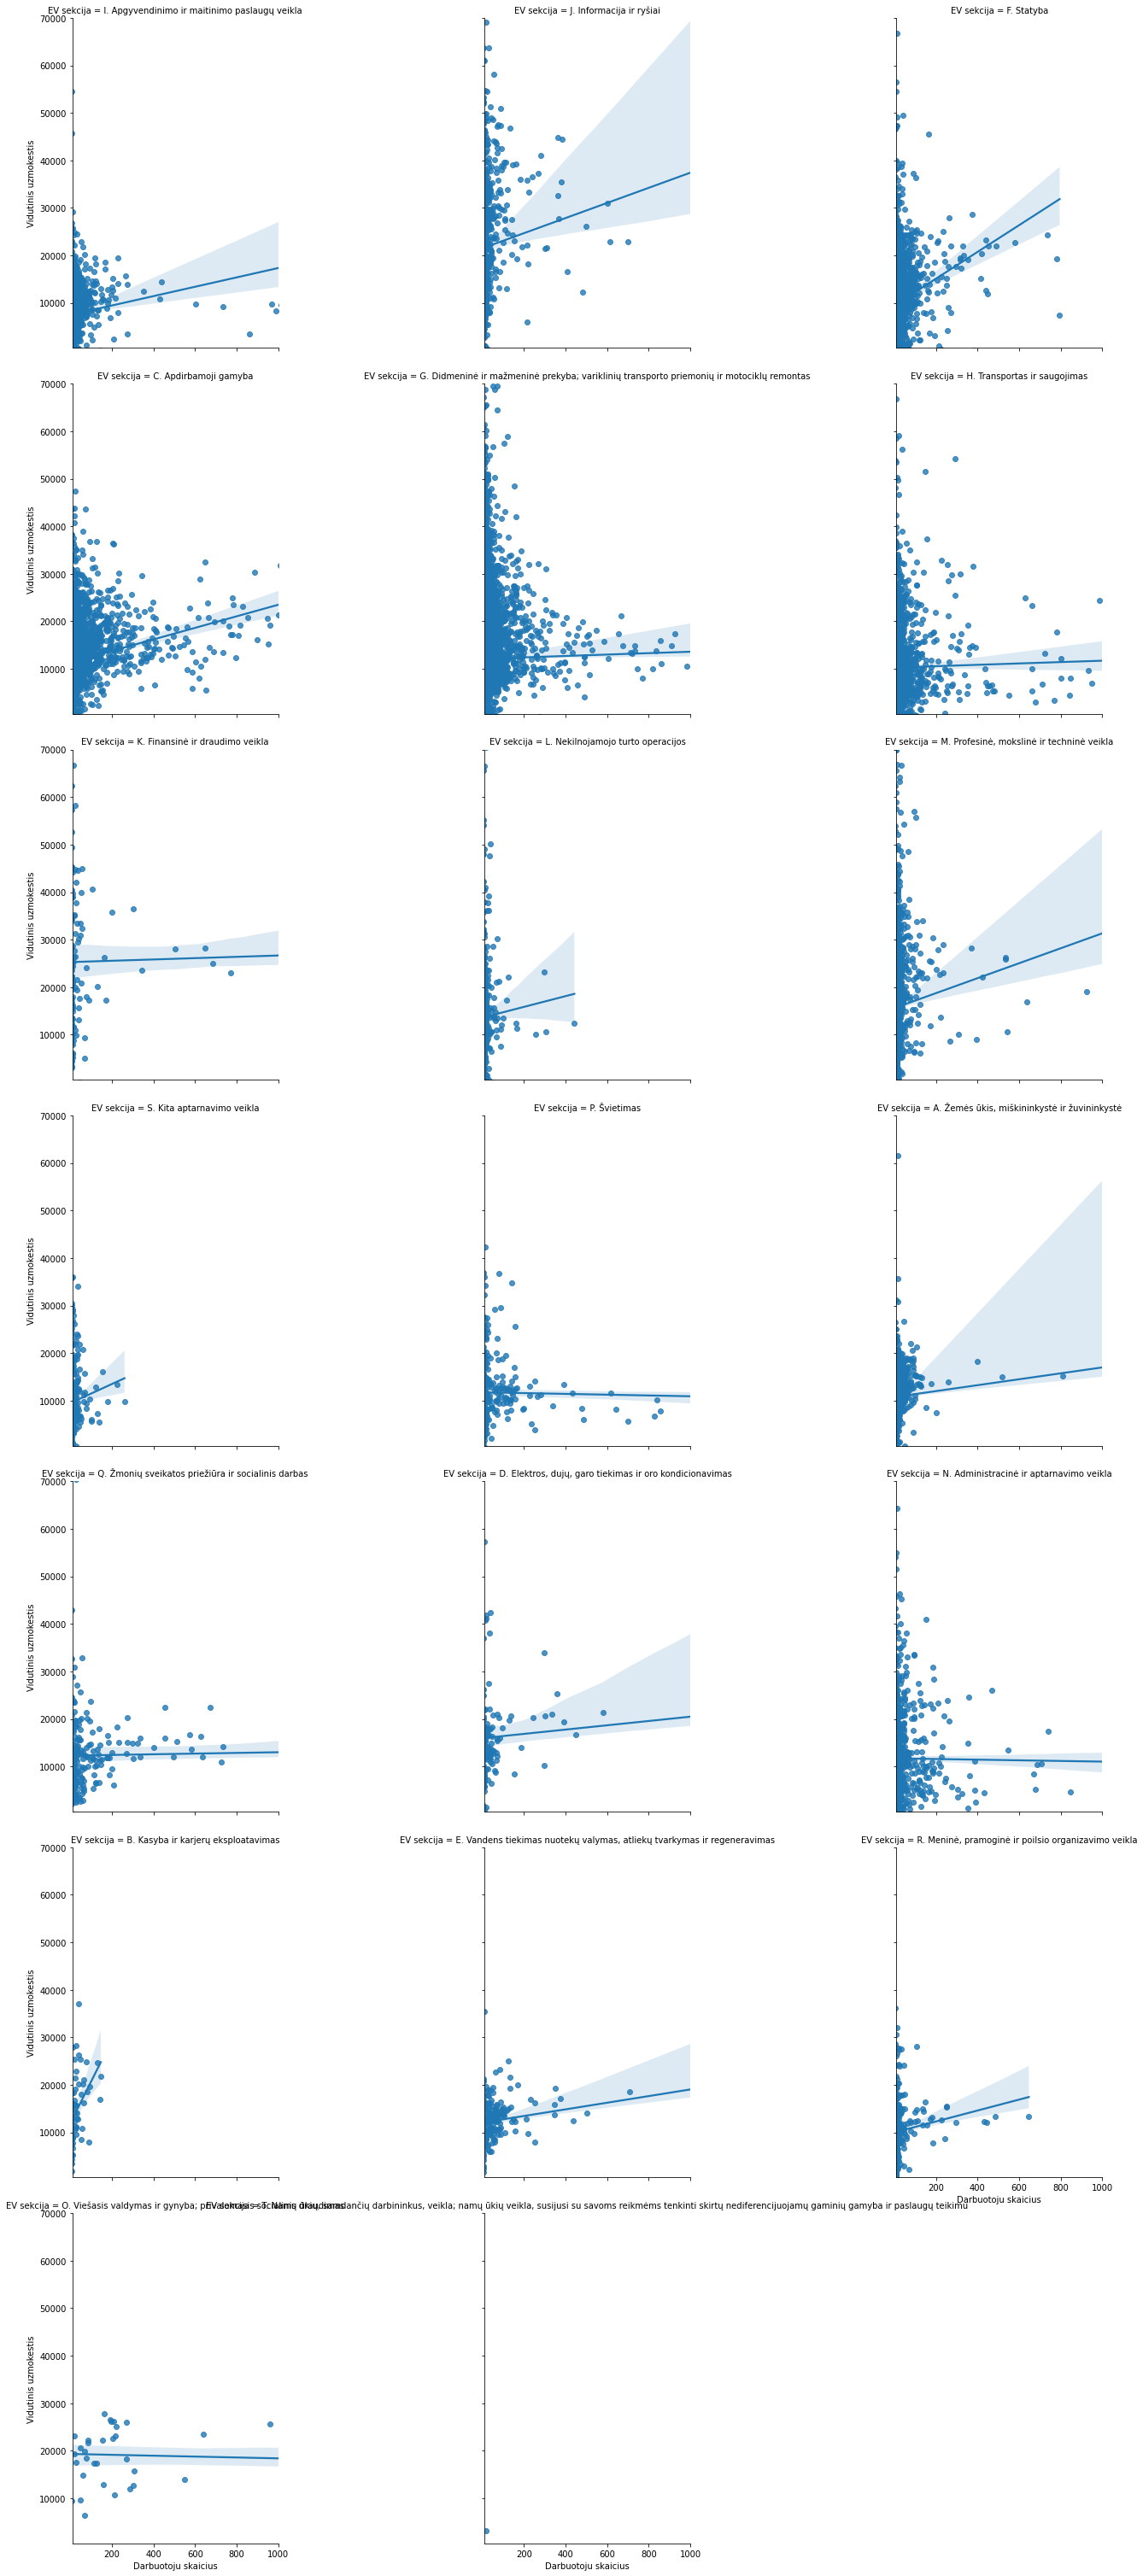

In [63]:
g = sns.lmplot(
    x='Darbuotojai 20200301', 
    y='Vidutinis darbuotojo uzmokestis 2019m',
    col='EV sekcija',
    data=data_active[data_active['Darbuotojai 20200301']>5],
    fit_reg=True,
    col_wrap=3, 
    height=6      
    ).set_axis_labels("Darbuotoju skaicius", "Vidutinis uzmokestis").set(xlim=(10, 1000), ylim=(500, 70000)).fig.subplots_adjust(wspace=1)